In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
plt.style.use('seaborn-v0_8-paper')
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

In [3]:
# Time dependent language shift
def time_dep_shift(t,x):
	return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x

def plot_shift(solution,label,t_line=True):
    plt.plot(solution.t, solution.y[0], label=label)
    if t_line==True:
        plt.axvline(t_change, linestyle='--', c='gray')
    return

def s_t(t):
    if t<t_change: s_t = s0
    else: s_t = s1
    return s_t

def a_t(t):
    if t<t_change: a_t = a0
    else: a_t = a1
    return a_t

# Time span parameters
t_span = (0, 100)  # Simulate for t between 0 and 100
t_eval = np.linspace(*t_span, 500)  # Time points where we want the solution

C:\Users\cisco\AppData\Local\Temp\ipykernel_42972\2866275697.py:3: RuntimeWarning: invalid value encountered in power
  return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x


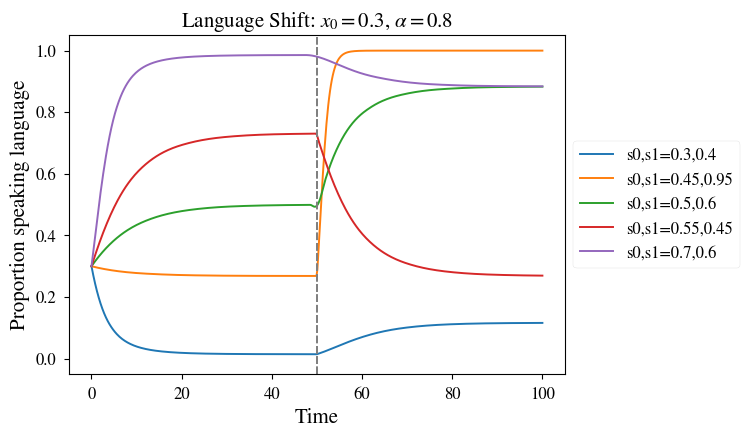

In [4]:
t_change =50
x0 = 0.3
s_vec = [(0.3,0.4),(0.45,0.95),(0.5,0.6),(0.55,0.45),(0.7,0.6)]
a0,a1 = 0.8,0.8

# Plot solutions with diferent prestige
for s in s_vec:
    s0,s1 = s
    solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval)
    plot_shift(solution,label=f's0,s1={s0},{s1}')

plt.xlabel('Time')
plt.ylabel('Proportion speaking language')
plt.title(f'Language Shift: $x_0={x0}$, $\\alpha={a0}$')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylim(-0.05,1.05)
plt.show()

C:\Users\cisco\AppData\Local\Temp\ipykernel_42972\2866275697.py:3: RuntimeWarning: invalid value encountered in power
  return s_t(t)*x**a_t(t)*(1-x)-(1-s_t(t))*(1-x)**a_t(t)*x


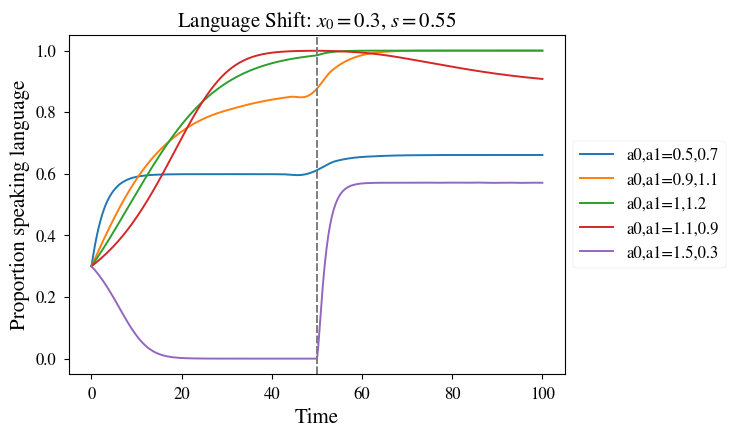

In [5]:
t_change =50
x0 = 0.3
a_vec = [(0.5,0.7),(0.9,1.1),(1,1.2),(1.1,0.9),(1.5,0.3)]
s0,s1 = 0.55,0.55

# Plot solutions with diferent prestige
for a in a_vec:
    a0,a1 = a
    solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval)
    plot_shift(solution,label=f'a0,a1={a0},{a1}')

plt.xlabel('Time')
plt.ylabel('Proportion speaking language')
plt.title(f'Language Shift: $x_0={x0}$, $s={s0}$')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylim(-0.05,1.05)
plt.show()

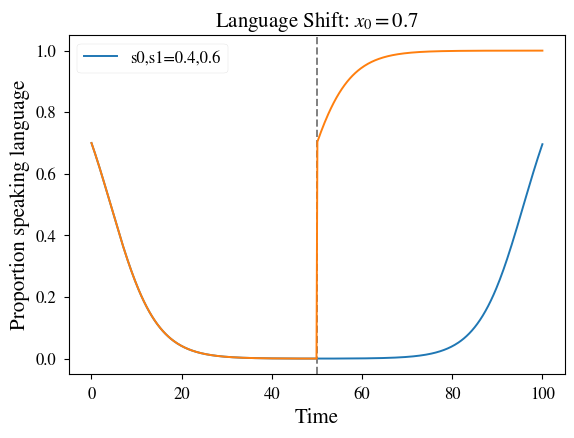

In [6]:
t_change =50
x0 = 0.7
s0,s1 = 0.4,0.6
a0,a1 = 1,1

def f(t):
    if t<t_change: return 1/((1-x0)/x0*np.exp(0.2*t)+1)
    else: return 1/((1-x0)/x0*np.exp(10-0.2*t)+1)

f_t = np.vectorize(f)
solution = solve_ivp(time_dep_shift, t_span, [x0], t_eval=t_eval)
plot_shift(solution,label=f's0,s1={s0},{s1}')
plt.plot(t_eval,f_t(t_eval))
plt.xlabel('Time')
plt.ylabel('Proportion speaking language')
plt.title(f'Language Shift: $x_0={x0}$')

plt.legend()
plt.ylim(-0.05,1.05)
plt.show()

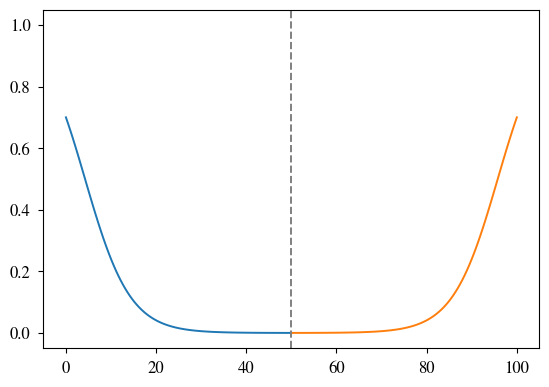

In [7]:
x0 = 0.7
s1,s2 = 0.4,0.6

t = np.linspace(0,50,100)


x1 = 1/((1-x0)/x0*np.exp(0.2*t)+1)
x2 = 1/((1-x0)/x0*np.exp(10-0.2*t)+1)


plt.plot(t,x1)
plt.plot(t+50,x2)
plt.ylim(-0.05,1.05)
plt.axvline(t_change, linestyle='--', c='gray')
#plt.xlim(0,100)